In [771]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задача 1
в заданиях:<br>
Постройте график<br>
Назовите график<br>
Сделайте именование оси x и оси y<br>
Сделайте выводы
### 1.1. Данные из прошлого дз

In [772]:
df = pd.read_csv('kc-house-data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости

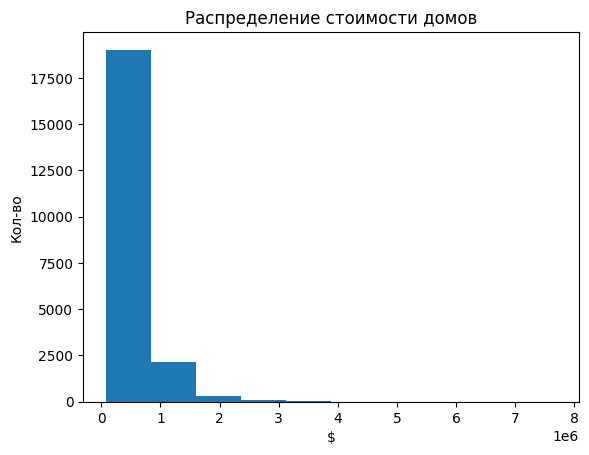

In [773]:
plt.hist(df['price'])
plt.xlabel('$')
plt.ylabel('Кол-во')
plt.title('Распределение стоимости домов');

Большинство домов стоимостью примерно до 800 тыс. долларов. Стоимостью больше полутора миллионов - незначительное количество.<br>
Построим boxplot с увеличенными до 3-х межквартильных расстояний усами, Остальное будем считать выбросами.

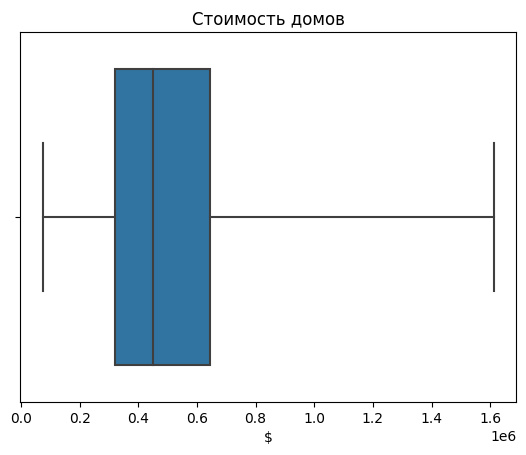

In [774]:
sns.boxplot(x=df['price'], whis=3, showfliers=False);
plt.title('Стоимость домов');
plt.xlabel('$');

50 % домов стоимостью примерно от 310 до 650 тысяч долларов.

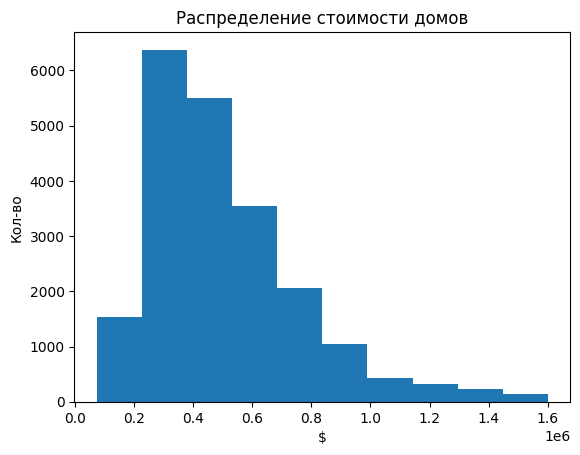

In [775]:
plt.hist(df[df['price']<1600000]['price'])
plt.xlabel('$')
plt.ylabel('Кол-во')
plt.title('Распределение стоимости домов');

Теперь видно, что стоимость большинства домов лежит в диапазоне от 250 до 675 тысяч долларов.<br>
или так

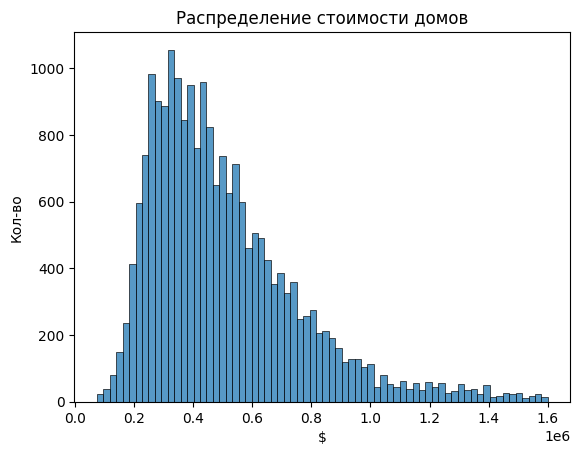

In [776]:
sns.histplot(df[df['price']<1600000]['price'])
plt.xlabel('$')
plt.ylabel('Кол-во')
plt.title('Распределение стоимости домов');

### 1.3 Изучите распределение квадратуры жилой

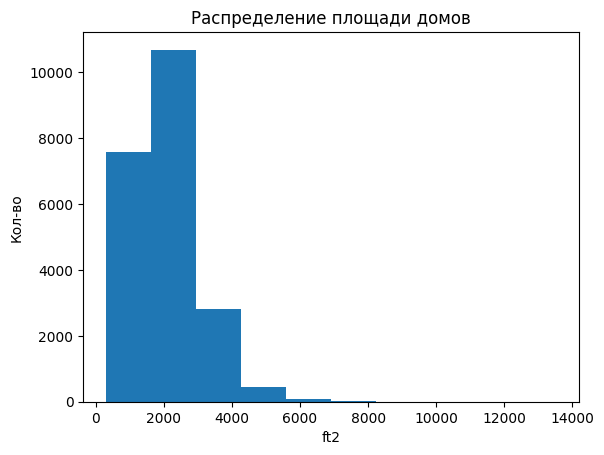

In [777]:
plt.hist(df['sqft_living'])
plt.xlabel('ft2')
plt.ylabel('Кол-во')
plt.title('Распределение площади домов');

Большинство домов площадью примерно до 4100 футов квадратных. Площадью больше 7000 практически нет.<br>
Построим boxplot.

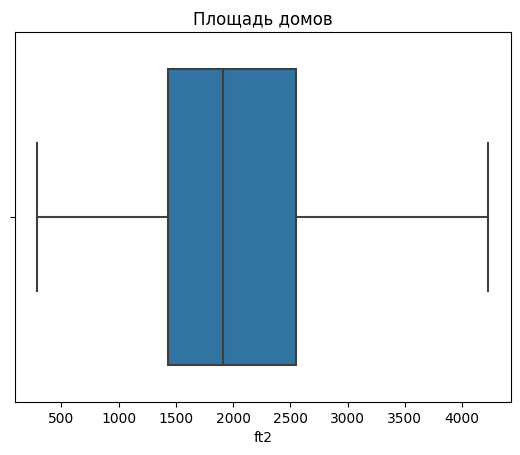

In [778]:
sns.boxplot(x=df['sqft_living'], showfliers=False);
plt.xlabel('ft2');
plt.title('Площадь домов');

Площадь 50 % домов лежит примерно от 1375 до 2600 футов квадратных.

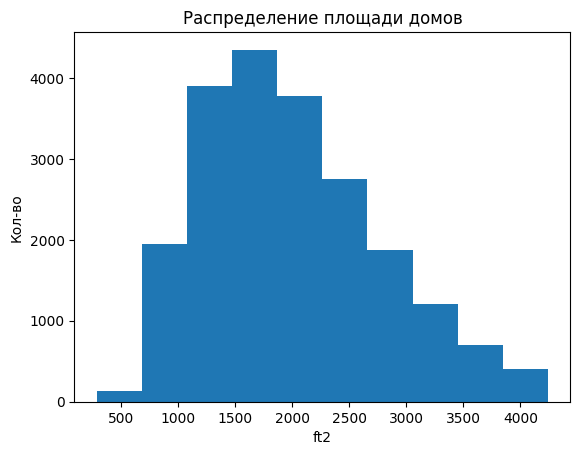

In [779]:
plt.hist(df[df['sqft_living']<4250]['sqft_living'])
plt.xlabel('ft2')
plt.ylabel('Кол-во')
plt.title('Распределение площади домов');

Теперь видно, что площадь большинства домов лежит в диапазоне от 700 до 3000 футов квадратных, с максимумом от 1500 до 2000 футов квадратныз<br>
или так

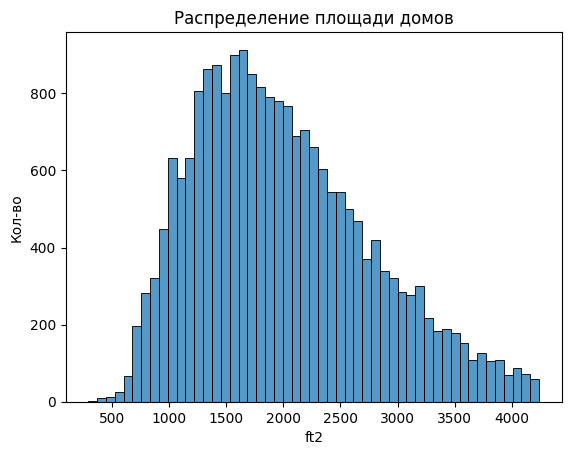

In [780]:
sns.histplot(df[df['sqft_living']<4250]['sqft_living'])
plt.xlabel('ft2')
plt.ylabel('Кол-во')
plt.title('Распределение площади домов');

### 1.4 Изучите распределение года постройки

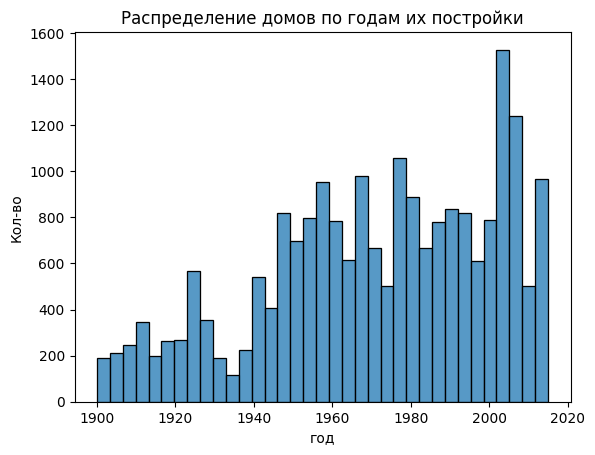

In [781]:
sns.histplot(df['yr_built'])
plt.xlabel('год')
plt.ylabel('Кол-во')
plt.title('Распределение домов по годам их постройки');

Дома строились от 1900 до 2016 с примерно равномерно увеличивающимся ежегодным количеством. С просадкой в 1930-1939 годах, примерно в 1975, 1997 и 2012 годах. Бум строительства 1923-1926, и 2002-2006.

## Задача 2
в заданиях:<br>
Постройте график<br>
Сделайте выводы
### 2.1 Изучите распределение домов от наличия вида на набережную

In [782]:
df['vid'] = df['waterfront'].apply(lambda x: 'нет' if x==0 else 'есть')
data = df['vid'].value_counts()
data

нет     21450
есть      163
Name: vid, dtype: int64

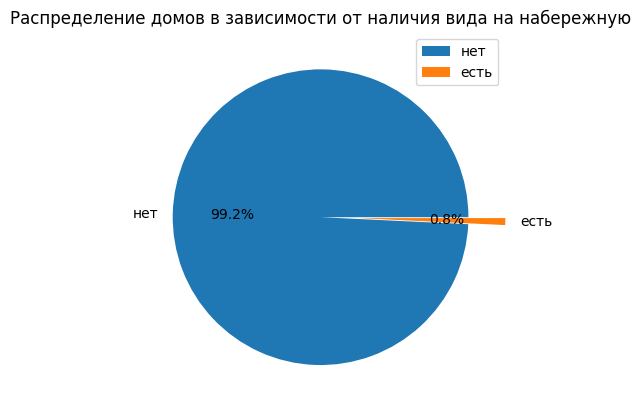

In [783]:
def calcExplodes(data):
    explod = []
    k = 1
    for val in data.values:
        if val < data.values.sum() * 0.02:
            explod.append(0.25 * k)
            k += 1
        else:
            explod.append(0)
    return explod

plt.pie(data.values, explode= calcExplodes(data), labels= data.index, autopct= '%1.1f%%');
plt.legend(data.index);
plt.title('Распределение домов в зависимости от наличия вида на набережную');

Домов с видом на набережную 0,8 %

### 2.2 Изучите распределение этажей домов

In [784]:
data = df['floors'].value_counts().sort_index()
data

1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: floors, dtype: int64

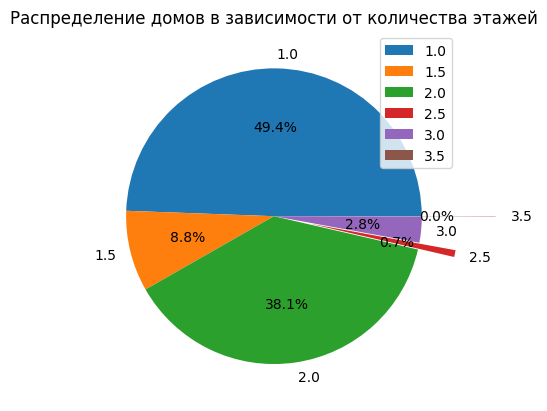

In [785]:
plt.pie(data.values, explode= calcExplodes(data), labels= data.index, autopct= '%1.1f%%');
plt.legend(data.index);
plt.title('Распределение домов в зависимости от количества этажей');

Почти половина домов - одноэтажные.<br>
Домов выше двух этажей примерно 3,5 %.

### 2.3 Изучите распределение состояния домов

In [786]:
def get_condition(x):
    if x==3: cond='среднее'
    elif x==4: cond='хорошее'
    elif x==5: cond='очень хорошее'
    elif x==2: cond='удовлетворительное'
    else: cond='плохое'
    return cond

df['cond_txt'] = df['condition'].apply(get_condition)
data = df['cond_txt'].value_counts()
data

среднее               14031
хорошее                5679
очень хорошее          1701
удовлетворительное      172
плохое                   30
Name: cond_txt, dtype: int64

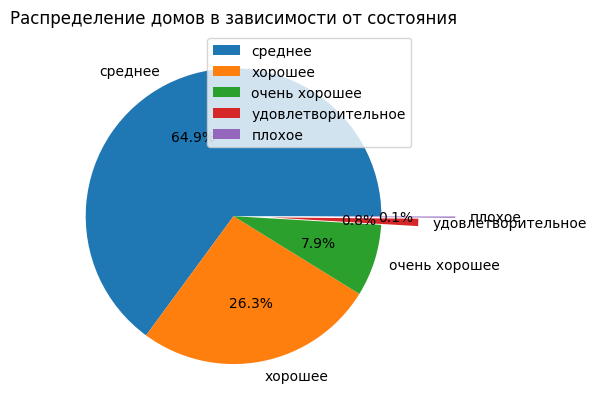

In [787]:
plt.pie(data.values, explode= calcExplodes(data), labels= data.index, autopct= '%1.1f%%');
plt.legend(data.index);
plt.title('Распределение домов в зависимости от состояния');

Почти две трети домов имеют среднее состояние, более четверти - хорошее.<br>
Менее 1% домов имеют состояние ниже среднего.

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.<br>
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Совершенно не понял фразу "с применением не менее 5 диаграмм из урока".

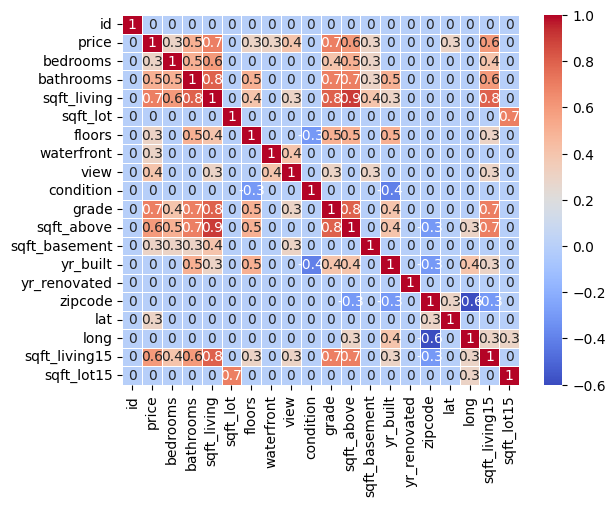

In [788]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

Самый высокий коэффициент корреляции со стоимостью недвижимости равен 0,7. Что соответствует границе между высокой и заметной корреляцией.<br>
Такой коэффициент корреляции принадлежит жилой площади и классу недвижимости. Эти два параметра сильнее всего влияют на стоимость недвижимости.<br>
Параметр "жилая площадь без площади подвала" - меньше коррелирует со стоимостью. Параметр "sqft_living15" - не знаю что такое.<br>
Также умеренно коррелирует количество ванных комнат со стоимостью недвижимости.<br>
Остальные параметры имеют заметно меньшую линейную корреляцию со стоимостью жилья.

Стоимость домов в зависимости от площади жилья:

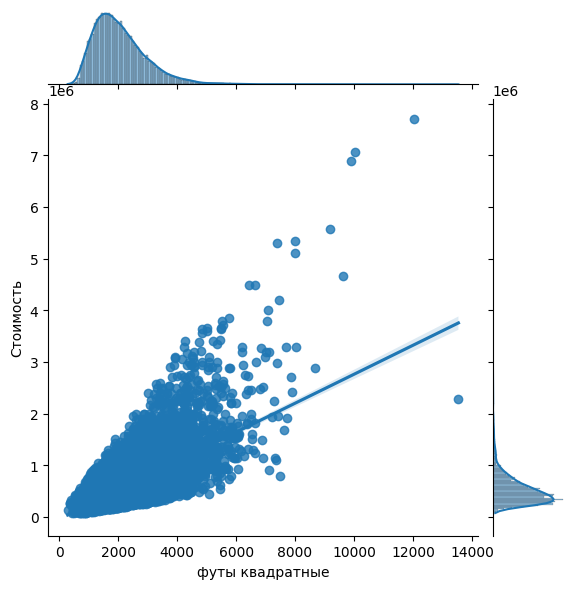

In [789]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');
plt.xlabel('футы квадратные')
plt.ylabel('Стоимость');

С увеличением площади стоимость растёт, но растёт и разброс.

Стоимость домов в зависимости от площади жилья(без учёта подвала):

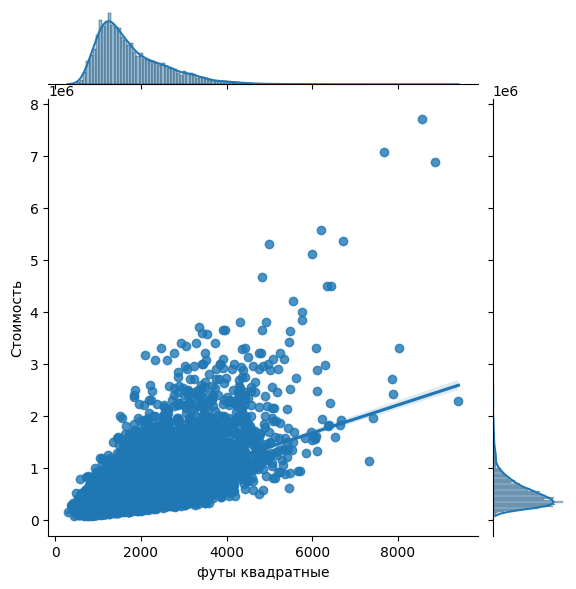

In [790]:
sns.jointplot(x=df['sqft_above'], y=df['price'], kind='reg');
plt.xlabel('футы квадратные')
plt.ylabel('Стоимость');

Очень похожая зависимость на предыдущую.

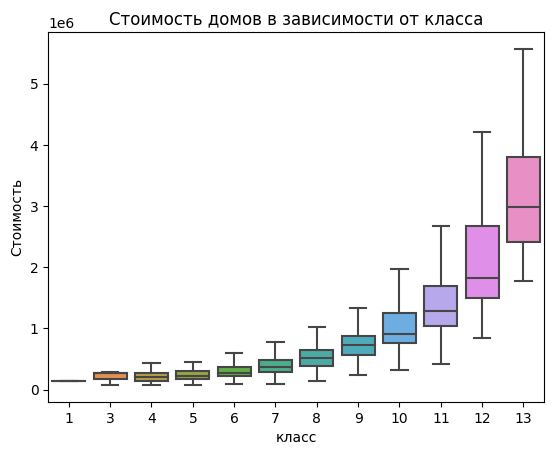

In [791]:
sns.boxplot(x=df['grade'], y=df['price'], showfliers=False)
plt.title('Стоимость домов в зависимости от класса');
plt.xlabel('класс')
plt.ylabel('Стоимость');

С увеличением класса жилья растёт и стоимость. Но я бы сказал, что зависимочть экспоненциальная или квадратичная. Также растёт и разброс.

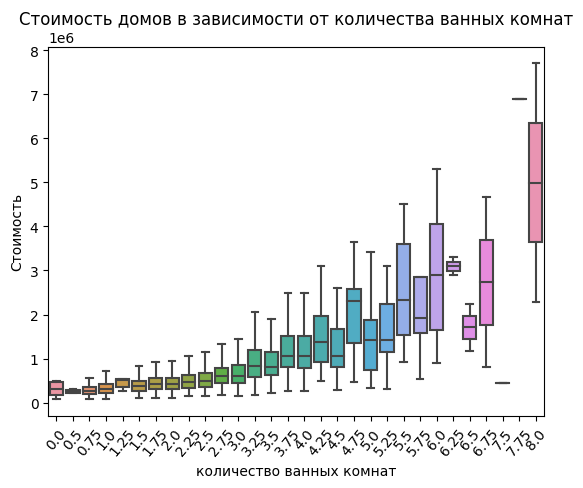

In [792]:
sns.boxplot(x=df['bathrooms'], y=df['price'], showfliers=False)
plt.title('Стоимость домов в зависимости от количества ванных комнат');
plt.xticks(rotation=50);
plt.xlabel('количество ванных комнат')
plt.ylabel('Стоимость');

С увеличением количества ванных комнат растёт и стоимость (скорее с ростом ваннных комнат - растёт и площадь). Но я бы сказал, что зависимочть больше похожа на экспоненциальную или квадратичную. Также растёт и разброс.

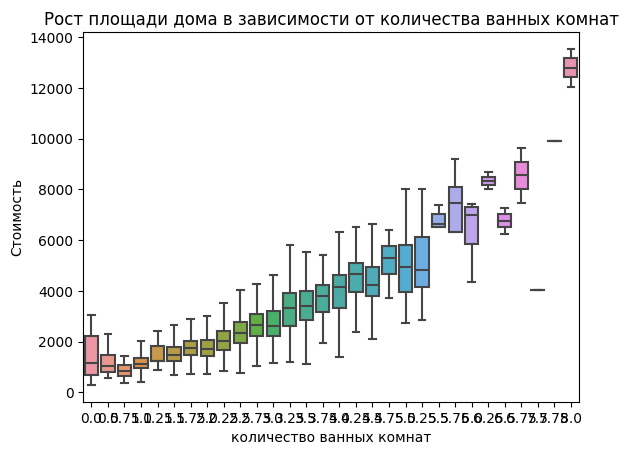

In [793]:
sns.boxplot(x=df['bathrooms'], y=df['sqft_living'], showfliers=False)
plt.title('Рост площади дома в зависимости от количества ванных комнат');
plt.xlabel('количество ванных комнат')
plt.ylabel('Стоимость');

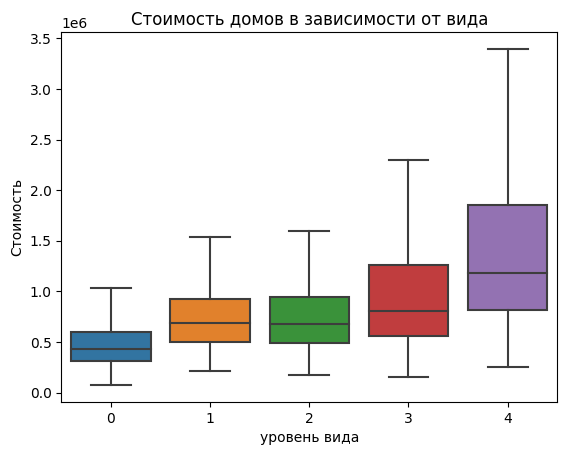

In [794]:
sns.boxplot(x=df['view'], y=df['price'], showfliers=False)
plt.title('Стоимость домов в зависимости от вида');
plt.xlabel('уровень вида')
plt.ylabel('Стоимость');

С улучшением вида растёт и стоимость.

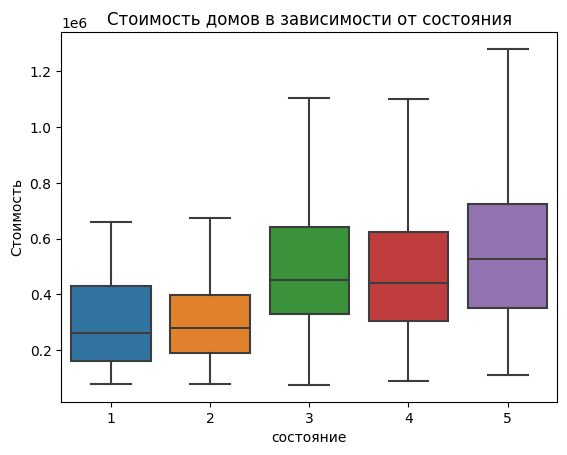

In [795]:
sns.boxplot(x=df['condition'], y=df['price'], showfliers=False)
plt.title('Стоимость домов в зависимости от состояния');
plt.xlabel('состояние')
plt.ylabel('Стоимость');

Стоимость в зависимости от состояния растёт незначительно и скорее по группам: плохое-удовлетворительное, среднее-хорошее, очень хорошее.

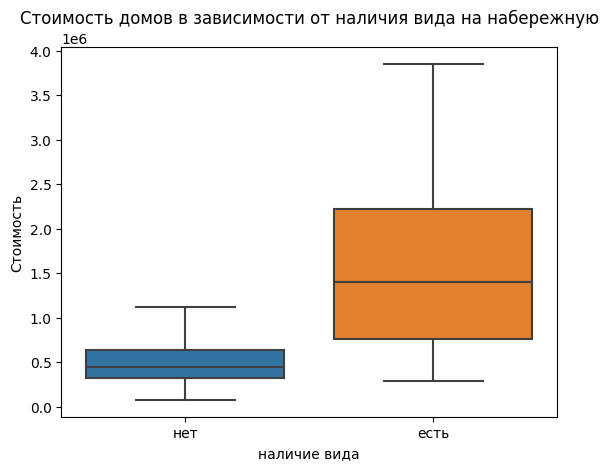

In [796]:
sns.boxplot(x=df['vid'], y=df['price'], showfliers=False)
plt.title('Стоимость домов в зависимости от наличия вида на набережную');
plt.xlabel('наличие вида')
plt.ylabel('Стоимость');

Дома с видом на набережную дороже домов, не имеющих такого вида.<br>
Однако вывод о том, что вид на набережную повышает стоимость дома, на основании этого графика сделать нельзя - возможно все дома с видом на набережную, просто больше, чем дома без такого вида.<br>
Однако, если отфильтровать:<br>
самый часто встречающийся класс среди домов с видом на набережную:

In [797]:
a=df[(df['waterfront']==1)]['grade'].value_counts()
aa=a[a==a.max()].index[0]
a

8     40
10    28
9     25
7     23
11    20
6     12
12    11
5      4
Name: grade, dtype: int64

а среди них самый часто встречающийся уровень "вида":

In [798]:
b=df[(df['waterfront']==1)&(df['grade']==aa)]['view'].value_counts()
bb=b[b==b.max()].index[0]
b

4    35
3     4
2     1
Name: view, dtype: int64

а среди них самое часто встречающеееся состояние домов:

In [799]:
c=df[(df['waterfront']==1)&(df['grade']==aa)&(df['view']==bb)]['condition'].value_counts()
cc=c[c==c.max()].index[0]
c

3    18
4    13
5     4
Name: condition, dtype: int64

а среди них наиболее часто встречающуюся этажность:

In [800]:
d=df[(df['waterfront']==1)&(df['grade']==aa)&(df['view']==bb)&(df['condition']==cc)]['floors'].value_counts()
dd=d[d==d.max()].index[0]
d

2.0    10
1.0     6
3.0     1
1.5     1
Name: floors, dtype: int64

И вот теперь сравним цены домов с видом на набережную и не имеющих такого вида среди домов с одинаковыми состояниями, классами, этажностью и уровнем вида:

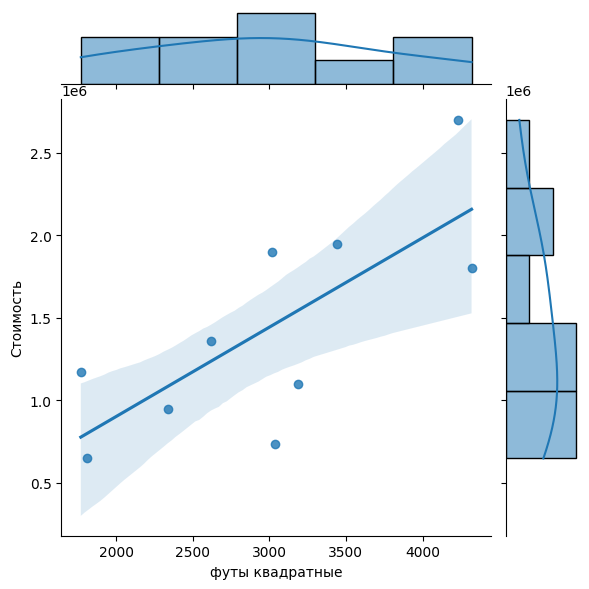

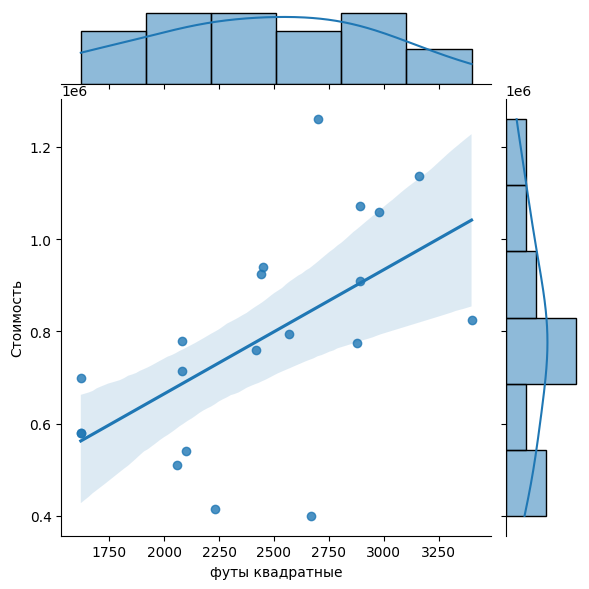

In [801]:
data=df[(df['waterfront']==1)&(df['grade']==aa)&(df['view']==bb)&(df['condition']==cc)&(df['floors']==dd)]
sns.jointplot(x=data['sqft_living'], y=data['price'], kind='reg');
plt.xlabel('футы квадратные')
plt.ylabel('Стоимость');
data0=df[(df['waterfront']==0)&(df['grade']==aa)&(df['view']==bb)&(df['condition']==cc)]
sns.jointplot(x=data0['sqft_living'], y=data0['price'], kind='reg');
plt.xlabel('футы квадратные')
plt.ylabel('Стоимость');

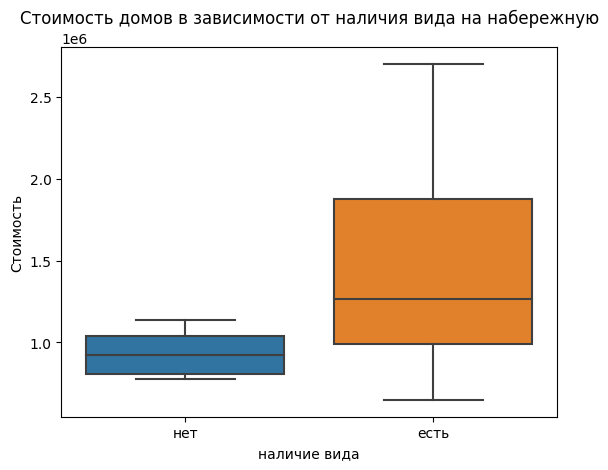

In [802]:
data=df[(df['grade']==aa)&(df['view']==bb)&(df['condition']==cc)&(df['floors']==dd)]
sns.boxplot(x=data['vid'].sort_index(ascending=False), y=data['price'], showfliers=False)
plt.title('Стоимость домов в зависимости от наличия вида на набережную');
plt.xlabel('наличие вида')
plt.ylabel('Стоимость');

Теперь чётко видно, что наличие вида на набережную - повышает стоимость дома.

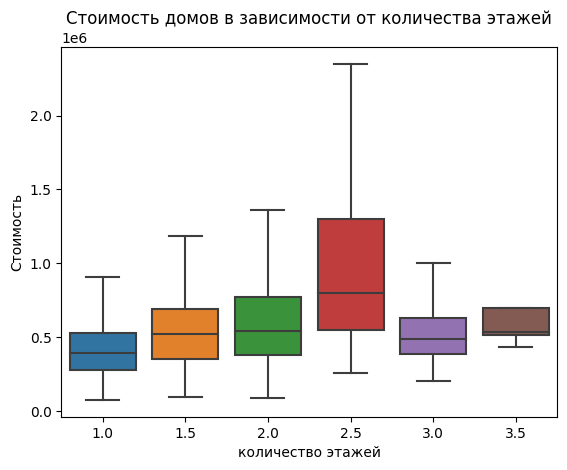

In [803]:
sns.boxplot(x=df['floors'], y=df['price'], showfliers=False)
plt.title('Стоимость домов в зависимости от количества этажей');
plt.xlabel('количество этажей')
plt.ylabel('Стоимость');

С ростом этажности (до 2,5) растет и стоимость домов. Дома в 3 и 3,5 этажа немного дешевле двухэтажных.

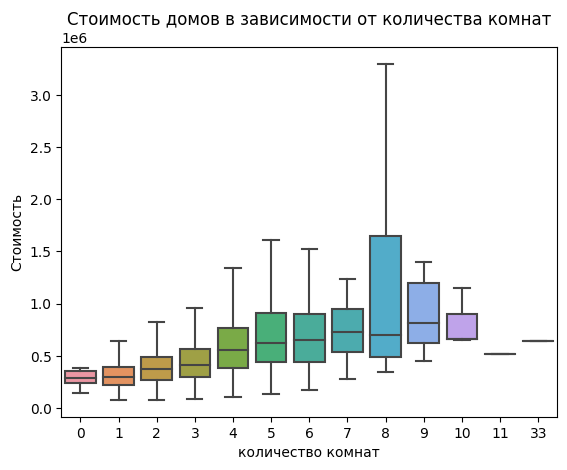

In [804]:
sns.boxplot(x=df['bedrooms'], y=df['price'], showfliers=False)
plt.title('Стоимость домов в зависимости от количества комнат');
plt.xlabel('количество комнат')
plt.ylabel('Стоимость');

Cтоимость домов растёт с ростом количества комнат (до 8), с дальнейшим ростом количества комнат -стоимость домов снижается. Дом с 33 комнатами - единственный - не является показательным.<br>
Тут скорее всего на рост стоимости оказывает влияние, что с ростом количества комнат растёт и площадь:

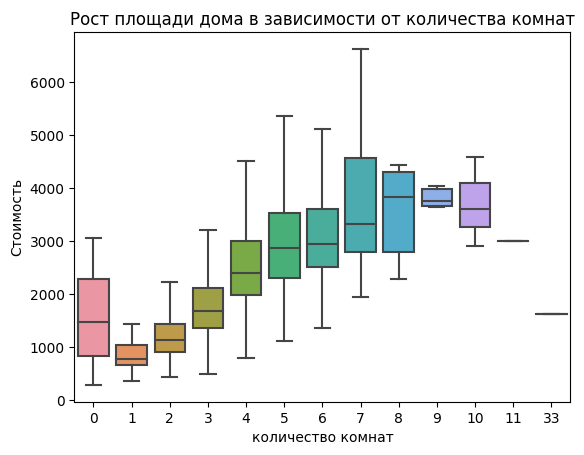

In [805]:
sns.boxplot(x=df['bedrooms'], y=df['sqft_living'], showfliers=False)
plt.title('Рост площади дома в зависимости от количества комнат');
plt.xlabel('количество комнат')
plt.ylabel('Стоимость');